Loading Libraries

In [ ]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [ ]:
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(np.unique(training_labels))
print(len(training_labels))

[0 1 2 3 4 5 6 7 8 9]
50000


In [ ]:
training_images.shape

(50000, 32, 32, 3)

In [ ]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

Visualizing Data

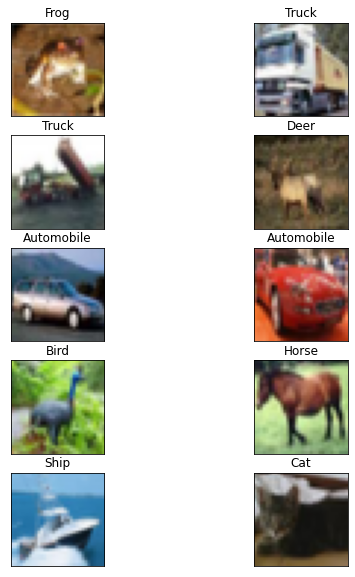

In [ ]:
plt.figure(figsize=(8,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
    
#  print(training_labels[i])
plt.show()

Image processing

In [ ]:
training_images = training_images/255
testing_images = testing_images/255

buidling model using softmax activation function

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax'),
])

In [ ]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

In [12]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 139s 89ms/step - loss: 0.9416 - accuracy: 0.7103
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.9650 - accuracy: 0.7033
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 0.9764 - accuracy: 0.6993
Epoch 4/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0467 - accuracy: 0.6905
Epoch 5/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.0231 - accuracy: 0.6885
Epoch 6/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0712 - accuracy: 0.6815
Epoch 7/10
1563/1563 [==============================] - 129s 82ms/step - loss: 1.1243 - accuracy: 0.6754
Epoch 8/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.1069 - accuracy: 0.6713
Epoch 9/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.0845 - accuracy: 0.6730
Epoch 10/10
1563/1563 [==============================] 

Checking Model perf

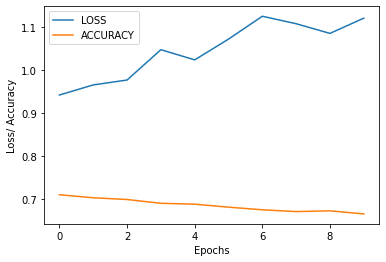

In [14]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['accuracy'], label="ACCURACY")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Accuracy')

plt.legend(loc='best')
plt.show()

In [15]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

In [16]:
print(accuracy_score(testing_labels, pred))
testing_labels=testing_labels.astype('float')
print(log_loss(testing_labels, prob))

0.7009
1.196194194735845


Predicting

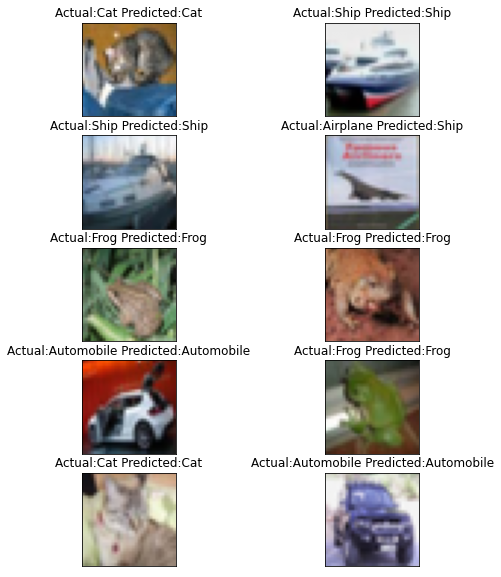

In [17]:
plt.figure(figsize=(8,10))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "Actual:"+ labels[testing_labels[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()